In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('./results/multiprocess_simulation_erdos_reyni/magnetization.csv', header = [0, 1], index_col = 0)
data

alpha    10                                       20                    ...  \
beta    0.2    0.4    0.6    0.8    1.0    1.2   0.2   0.4   0.6   0.8  ...   
0      -120     14    330   -366     48   -358    70   -84  -346   238  ...   
1       246     54    156   -682    658   -374   130   556  -510  1314  ...   
2       828    326    268  -1094   1704   -756   554  1222  -822  2916  ...   
3       838    372    446  -1882   3592  -1396   562  1642 -1636  4744  ...   
4       522    334    402  -3704   7508  -2784   478  2182 -3004  7020  ...   
...     ...    ...    ...    ...    ...    ...   ...   ...   ...   ...  ...   
2996   -348  10574  14318 -16114  17142 -17464  -342  5044 -7140  7924  ...   
2997   -230  10620  14424 -16180  17214 -17566  -168  5324 -7310  7768  ...   
2998   -432  10640  14798 -16218  17042 -17514  -480  5262 -7234  7814  ...   
2999  -1008  10398  14650 -16342  16892 -17448 -1072  4794 -7264  7558  ...   
3000   -724  10910  14998 -16170  16878 -17848  -830  5510 -6660  7958  ...   

alpha    40                     50                                
beta    0.6   0.8   1.0   1.2  0.2   0.4   0.6   0.8   1.0   1.2  
0       -22   122   -76  -176  188  -276   268    -8   222   232  
1        66   750 -1180  -318  572   468  1208   528   724  1160  
2       264  1156 -2790  -294  880   966  2008  1248  2056  2290  
3       672  1950 -4106  -710  696  1638  3100  2258  3112  3390  
4       846  3168 -4238 -1736  674  1852  3226  3216  3298  3380  
...     ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  
2996   3624  3638 -3954 -4112 -228 -2264  2748  3332  3100  3076  
2997   3270  4122 -4042 -3986  -74 -2054  3040  2948  3084  3320  
2998   3326  3762 -4268 -3788 -330 -2402  2982  2828  2840  3408  
2999   3144  3600 -3848 -4124 -944 -2594  2330  2794  3106  3370  
3000   3950  3924 -3642 -3922 -808 -2332  3022  3032  3456  3290  

[3001 rows x 30 columns]

In [72]:
# Change the levels of the multi-index columns to integer and float
data.columns = data.columns.set_levels([data.columns.levels[0].astype(int), data.columns.levels[1].astype(float)])

data[(10, 0.4)]

0          14
1          54
2         326
3         372
4         334
        ...  
2996    10574
2997    10620
2998    10640
2999    10398
3000    10910
Name: (10, 0.4), Length: 3001, dtype: int64

In [81]:
returns = np.log(np.abs(data)) - np.log(np.abs(data.shift(1)))

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [82]:
returns

alpha        10                                                          20  \
beta        0.2       0.4       0.6       0.8       1.0       1.2       0.2   
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1      0.717840  1.349927 -0.749237  0.622396  2.618004  0.043723  0.619039   
2      1.213682  1.797913  0.541131  0.472566  0.951529  0.703786  1.449630   
3      0.012005  0.131996  0.509332  0.542494  0.745731  0.613325  0.014337   
4     -0.473351 -0.107753 -0.103867  0.677078  0.737260  0.690278 -0.161891   
...         ...       ...       ...       ...       ...       ...       ...   
2996   0.231802 -0.001701  0.004059 -0.008774  0.010556  0.009435 -0.110610   
2997  -0.414123  0.004341  0.007376  0.004087  0.004191  0.005824 -0.710847   
2998   0.630346  0.001881  0.025599  0.002346 -0.010042 -0.002965  1.049822   
2999   0.847298 -0.023007 -0.010052  0.007617 -0.008841 -0.003776  0.803495   
3000  -0.330932  0.048066  0.023477 -0.010581 -0.000829  0.022666 -0.255856   

alpha                                ...        40                      \
beta        0.4       0.6       0.8  ...       0.6       0.8       1.0   
0           NaN       NaN       NaN  ...       NaN       NaN       NaN   
1      1.889951  0.387972  1.708561  ...  1.098612  1.816052  2.742536   
2      0.787476  0.477330  0.797137  ...  1.386294  0.432648  0.860527   
3      0.295426  0.688269  0.486668  ...  0.934309  0.522864  0.386408   
4      0.284327  0.607690  0.391883  ...  0.230261  0.485271  0.031642   
...         ...       ...       ...  ...       ...       ...       ...   
2996  -0.026992 -0.028171  0.024787  ...  0.022322 -0.065946  0.051906   
2997   0.054025  0.023530 -0.019883  ... -0.102788  0.124904  0.022012   
2998  -0.011714 -0.010451  0.005904  ...  0.016980 -0.091388  0.054406   
2999  -0.093146  0.004139 -0.033310  ... -0.056275 -0.044017 -0.103592   
3000   0.139199 -0.086811  0.051571  ...  0.228220  0.086178 -0.055021   

alpha                  50                                                    
beta        1.2       0.2       0.4       0.6       0.8       1.0       1.2  
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1      0.591567  1.112697  0.528067  1.505734  4.189655  1.182114  1.609438  
2     -0.078472  0.430783  0.724696  0.508173  0.860201  1.043726  0.680132  
3      0.881685 -0.234572  0.528067  0.434263  0.592937  0.414503  0.392278  
4      0.894074 -0.032120  0.122790  0.039841  0.353659  0.058051 -0.002954  
...         ...       ...       ...       ...       ...       ...       ...  
2996   0.083657 -0.123614  0.093457  0.031045 -0.028988 -0.019803  0.057541  
2997  -0.031121 -1.125281 -0.097344  0.100984 -0.122446 -0.005175  0.076335  
2998  -0.050950  1.495028  0.156513 -0.019263 -0.041557 -0.082423  0.026161  
2999   0.084985  1.051034  0.076899 -0.246726 -0.012095  0.089532 -0.011213  
3000  -0.050222 -0.155564 -0.106475  0.260051  0.081748  0.106776 -0.024025  

[3001 rows x 30 columns]

<Axes: >

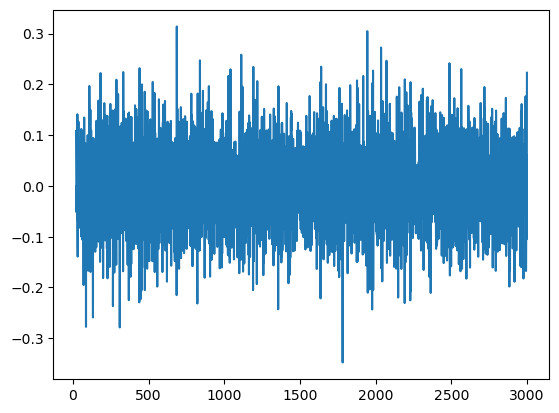

In [83]:
returns[(30, 0.4)][20:].plot()

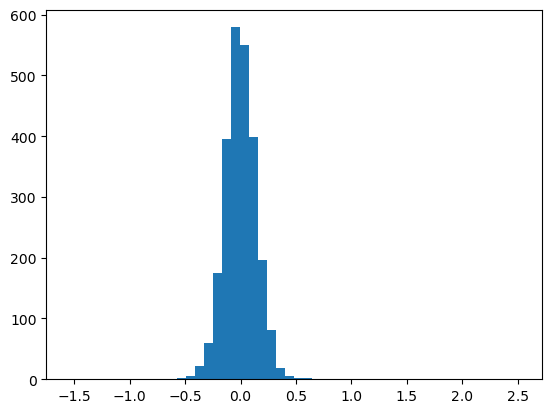

In [84]:
plt.hist(returns[(50, 0.4)][500:], bins=50)
plt.show()

In [85]:
returns.columns.levels[0]

Index([10, 20, 30, 40, 50], dtype='int64', name='alpha')

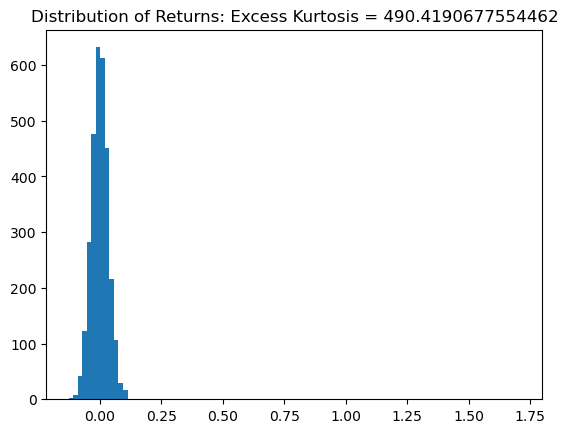

In [86]:
from scipy import stats

def plot_return_distribution(returns, save = True):
    #returns = np.log(self.M_t_values/self.M_t_values.shift(1))
    excess_kurtosis = stats.kurtosis(returns[np.isfinite(returns)])
    plt.hist(returns[np.isfinite(returns)], bins=100)
    plt.title(f'Distribution of Returns: Excess Kurtosis = {excess_kurtosis}')
    #if save == True: 
        #plt.savefig(path + 'return_distribution.png')

    plt.show()

plot_return_distribution(returns[20, 0.8], save = False)

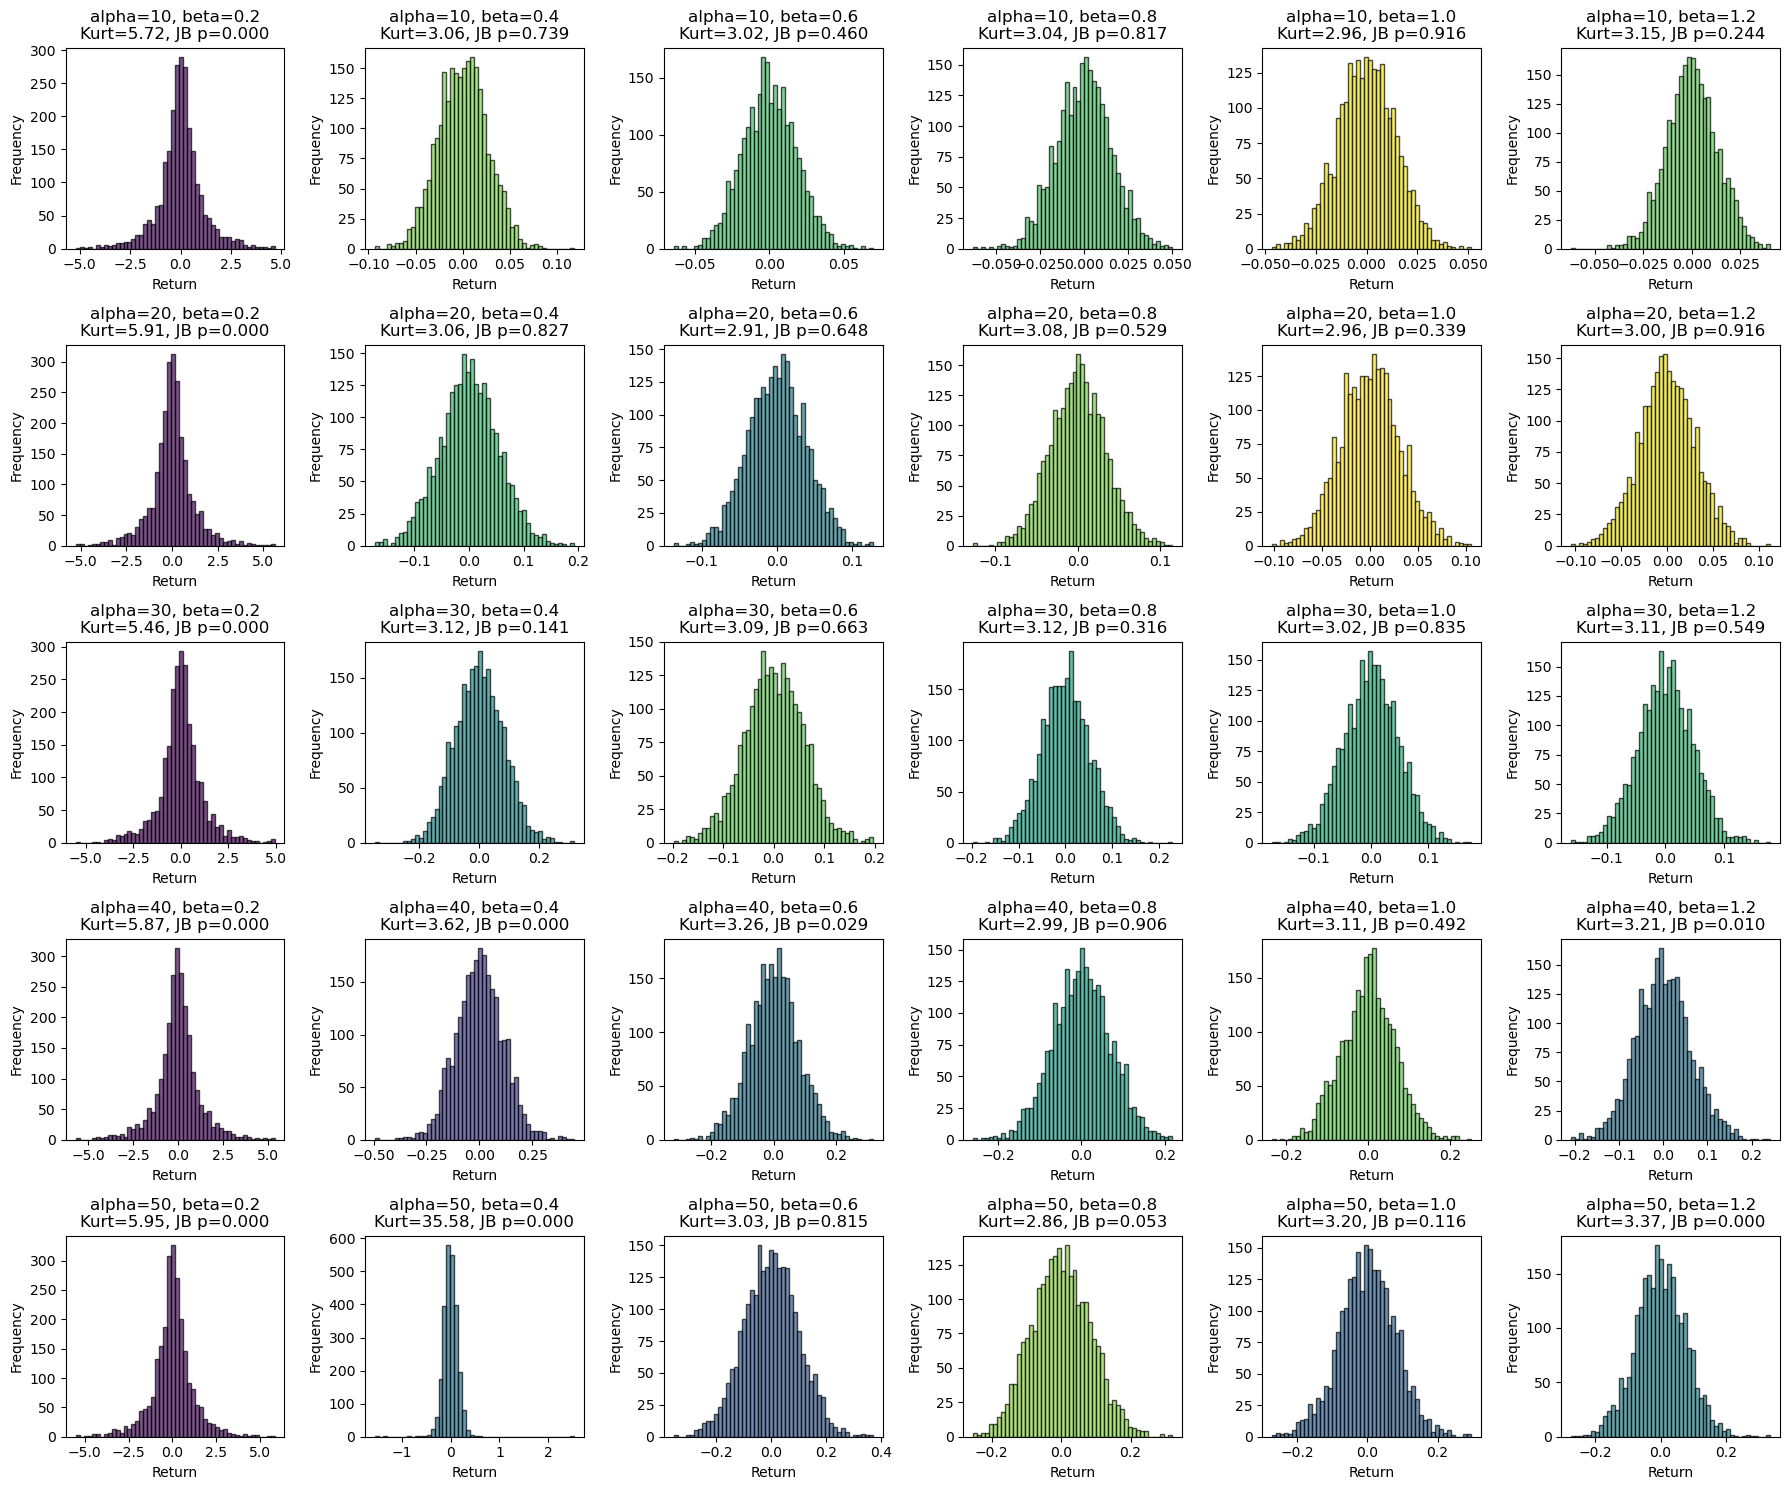

In [118]:
from matplotlib import cm

# ploting the distribution and kurtosis of $\beta$, and use Jarque-Bera test to test the normality of the distribution.

# Create a 5x6 grid of subplots
n_rows, n_cols = 5, 6
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 15))

# Flatten axes for easier iteration
axes = axes.flatten()

# Compute kurtosis for all columns and normalize for colormap
kurt_values = np.log([stats.kurtosis(returns[np.isfinite(returns)][col].dropna()) for col in returns.columns])
kurt_min, kurt_max = min(kurt_values), max(kurt_values)
norm_kurt = [(k - kurt_min) / (kurt_max - kurt_min) for k in kurt_values]  # Normalize between 0 and 1

# Iterate over each (alpha, beta) pair and plot the distribution
for idx, (col, ax) in enumerate(zip(returns.columns, axes)):
    #print(returns[np.isfinite(returns)][col].dropna())
    series = returns[np.isfinite(returns)][col].dropna()[500:]
    
    
    # Compute kurtosis and Jarque-Bera test
    kurt = stats.kurtosis(series, fisher=False)
    jb_stat, jb_p = stats.jarque_bera(series)

    color = cm.viridis(norm_kurt[idx])
    
    # Set title with kurtosis and p-value
    ax.hist(series, bins=50, edgecolor='k', alpha=0.7, color = color)
    ax.set_title(f'alpha={col[0]}, beta={col[1]}\nKurt={kurt:.2f}, JB p={jb_p:.3f}')
    ax.set_xlabel('Return')
    ax.set_ylabel('Frequency')
    #ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


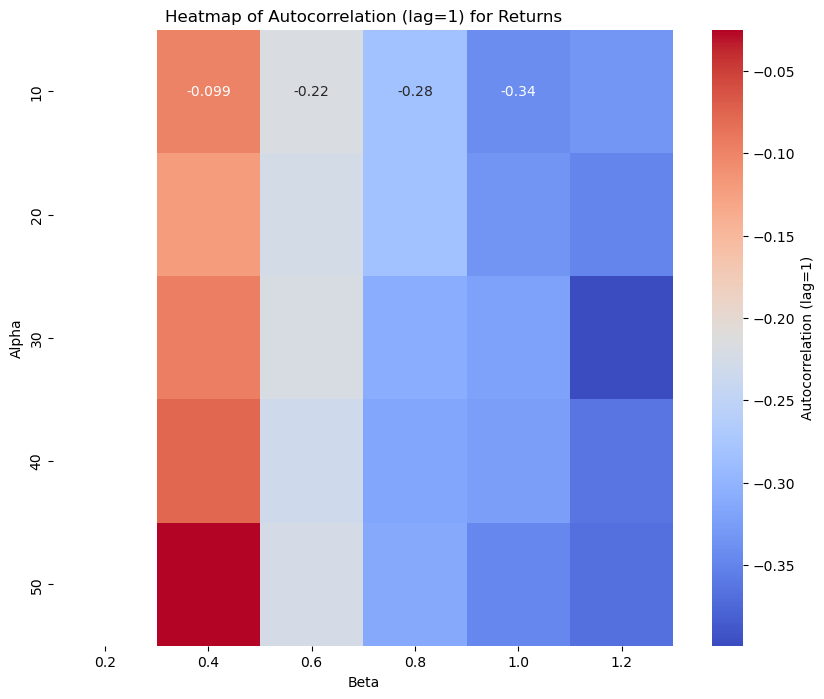

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


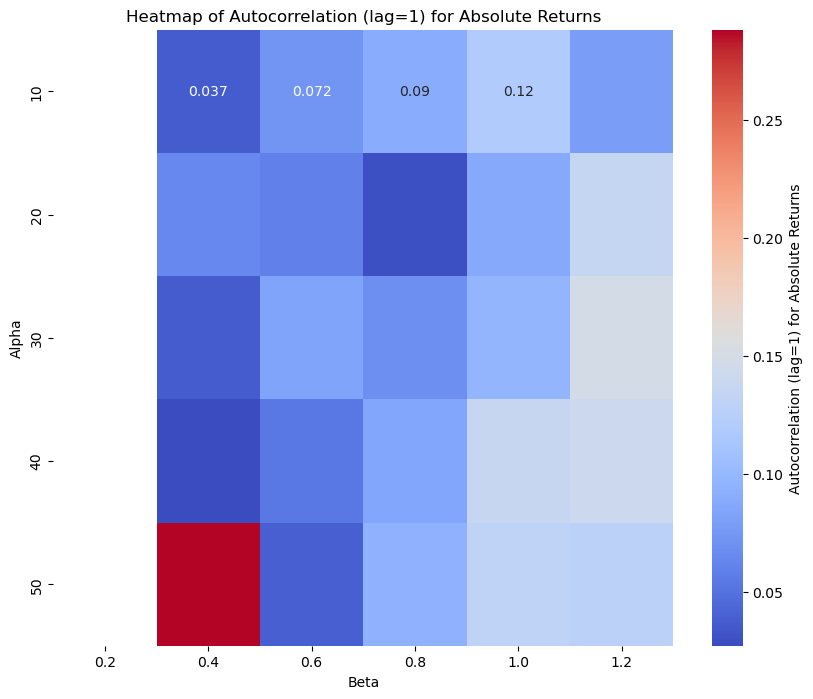

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'returns' DataFrame is already loaded with MultiIndex columns ('alpha', 'beta')

# Function to compute autocorrelation for a given lag
def autocorrelation(series, lag=1):
    return series.autocorr(lag)

# Define parameters for heatmap
alpha_values = returns.columns.levels[0]
beta_values = returns.columns.levels[1]
n_alpha = len(alpha_values)
n_beta = len(beta_values)

# Initialize heatmaps for return and absolute return
autocorr_heatmap = np.zeros((n_alpha, n_beta))
abs_autocorr_heatmap = np.zeros((n_alpha, n_beta))

# Compute autocorrelation for lag=1 for each (alpha, beta) pair
for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        series = returns[(alpha, beta)].dropna()[500:]
        autocorr_heatmap[i, j] = autocorrelation(series, lag=1)
        abs_autocorr_heatmap[i, j] = autocorrelation(series.abs(), lag=1)

# Plot heatmap for autocorrelation of returns using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(autocorr_heatmap, annot=True, xticklabels=beta_values, yticklabels=alpha_values, cmap='coolwarm', cbar_kws={'label': 'Autocorrelation (lag=1)'})
plt.title('Heatmap of Autocorrelation (lag=1) for Returns')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.show()

# Plot heatmap for autocorrelation of absolute returns using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(abs_autocorr_heatmap, annot=True, xticklabels=beta_values, yticklabels=alpha_values, cmap='coolwarm', cbar_kws={'label': 'Autocorrelation (lag=1) for Absolute Returns'})
plt.title('Heatmap of Autocorrelation (lag=1) for Absolute Returns')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.show()

